In [64]:
from src.bootstrap_error_analysis import *
from src.run_gsort_v2_wuericmod import get_significant_electrodes, get_vision_data
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
# %matplotlib ipympl
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
ANALYSIS_BASE = "/Volumes/Analysis/"
gsort_path = "/Volumes/Scratch/Users/praful/triplet_gsort_v2_30um_raphe-affinity_cosine"
dataset = "2020-09-29-2"
estim = "data007/data007-all"
wnoise = "kilosort_data002/data002"
thr_factor = 1
p = 1
n = 124

In [6]:
relevant_movies, total_probs, edge_probs, clusters, edges, electrodes = get_bootstrap_information(ANALYSIS_BASE, gsort_path,dataset, estim, wnoise,p,n)

FileNotFoundError: [Errno 2] No such file or directory: '/Volumes/Scratch/Users/ajphillips/papers/temporal_dithering_shah/gsort_jeff_exp/2022-02-08-1/data012/data000/p103'

In [ ]:
make_surface_plot(relevant_movies, total_probs, ANALYSIS_BASE,dataset, estim, p, n)

In [ ]:
dss, dss_stack, num_electrodes, num_samples, movie_stack= get_difference_signals(relevant_movies,clusters,edges,ANALYSIS_BASE, dataset, estim,p, electrodes)

In [ ]:
plt.figure()
ax = plt.subplot(111)
ax.plot(dss_stack[:100,0,:].T, color = "C0")
plt.show()

In [ ]:
average_ds, average_error_stack,std_error_stack, shifted_dss, shifted_dss_stack,error, error_stack = compute_average_diff_signal_and_error(dss,dss_stack, num_electrodes, num_samples)

In [ ]:
plt.figure()
ax = plt.subplot(212)
ax.plot(shifted_dss_stack[error_stack[:,0]> average_error[0],0,:].T, color = "C0")
ax.plot(average_ds[0,:].T, color = "C1")
ax.set_title("Bad spikes")
ax = plt.subplot(211)
ax.plot(shifted_dss_stack[error_stack[:,0]< average_error[0],0,:].T, color = "C0")
ax.plot(average_ds[0,:].T, color = "C1")

ax.set_title("Good spikes")
per_good_spikes = np.mean(error_stack[:,0]< average_error[0])
plt.suptitle(f"% good spikes = {per_good_spikes}")
plt.show()

In [ ]:
mean_edge_error = get_mean_edge_error(error)

In [ ]:
new_edge_probs = get_modified_edge_probs(mean_edge_error, edge_probs,average_error)

In [ ]:
new_total_probs = np.array([np.sum(p) for p in new_edge_probs])

In [ ]:
plt.figure()
ax = plt.subplot(111)
ax.hist(new_total_probs-total_probs, bins = 20);

In [ ]:
make_surface_plot(relevant_movies, new_total_probs, ANALYSIS_BASE,dataset, estim, p, n)

# Lollipop analysis

In [2]:
ANALYSIS_BASE = "/Volumes/Analysis/"
gsort_path = "/Volumes/Scratch/Users/ajphillips/papers/temporal_dithering_shah/gsort_jeff_exp/"
dataset = "2022-02-08-1"
estim = "data007"
wnoise = "streamed/data000"
thr_factor = 1
ps = [int(p[1:]) for p in os.listdir(os.path.join(gsort_path, dataset, estim)) if 'p' in p]
n = 4906

In [3]:
vcd = get_vision_data(ANALYSIS_BASE, dataset, wnoise)

In [4]:
relevant_movies, total_probs, edge_probs, clusters, edges, electrodes,num_trials = get_bootstrap_information(ANALYSIS_BASE, gsort_path,dataset, estim, "",ps,n, electrodes_stored = False)


6160it [00:21, 284.44it/s] 


In [5]:
ei = vcd.get_ei_for_cell(n).ei
noise = vcd.channel_noise
electrodes = get_significant_electrodes(ei, ['mixed', 'soma'], noise)

In [6]:
dss, dss_stack, dss_inds, num_electrodes, num_samples, movie_stack= get_difference_signals(relevant_movies,clusters,edges,ANALYSIS_BASE, dataset, estim, electrodes)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6160/6160 [08:36<00:00, 11.92it/s]


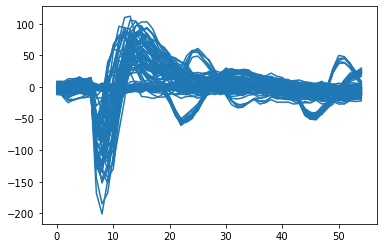

In [7]:
plt.figure()
ax = plt.subplot(111)
ax.plot(dss_stack[:100,0,:].T, color = "C0")
plt.show()

In [8]:
average_ds, average_error,std_error, shifted_dss, shifted_dss_stack,error, error_stack = compute_average_diff_signal_and_error(dss,dss_stack, num_electrodes, num_samples)

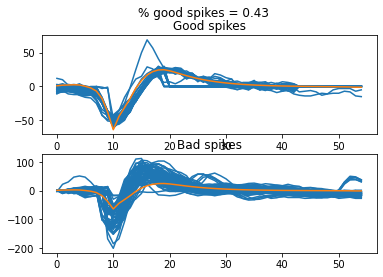

In [9]:
test_set = [0,1,2]
electrode = 0
factor = 0
plot_spike_split_on_electrode(shifted_dss_stack[:100],average_ds[:100], error_stack[:100],average_error, std_error, factor,electrode , test_set)

In [10]:
mean_edge_error = get_mean_edge_error(error)
test_set = [i for i in range(len(electrodes))]
factor = 0
new_edge_probs = get_modified_edge_probs(mean_edge_error, edge_probs,average_error,std_error, factor, test_set)

In [11]:
test_set = [i for i in range(len(electrodes))]
factor = 0
new_edge_probs = get_modified_edge_probs(mean_edge_error, edge_probs,average_error,std_error, factor, test_set)

In [12]:
new_total_probs = np.array([np.sum(p) for p in new_edge_probs])

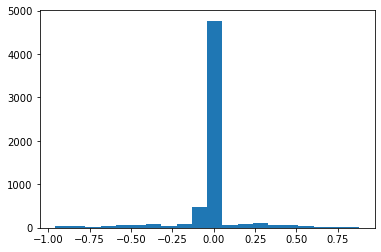

In [13]:
plt.figure()
ax = plt.subplot(111)
ax.hist(new_total_probs-total_probs, bins = 20);

In [21]:
test_set = [0, 1, 2]
electrode = 0
factor = -0.25
new_instance_probs = get_instance_modified_edge_probs(edge_probs, error, dss_inds, average_error, std_error, factor, test_set,num_trials)

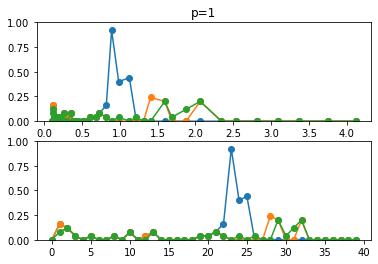

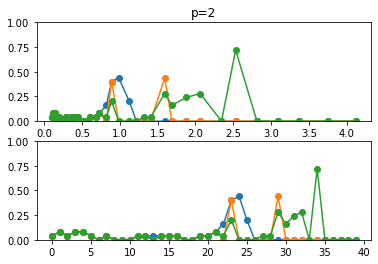

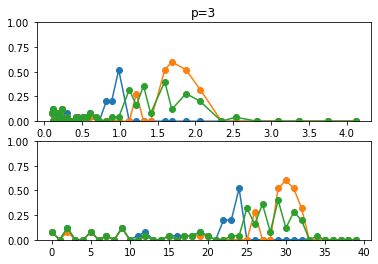

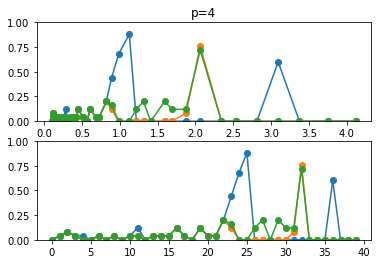

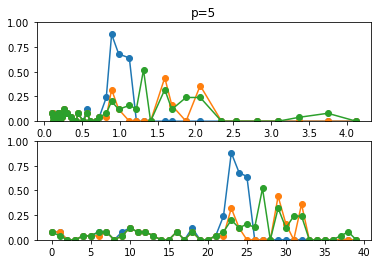

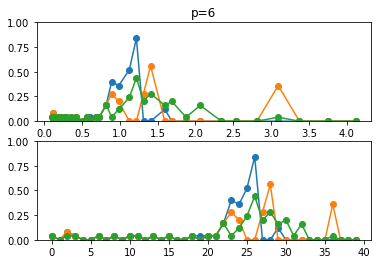

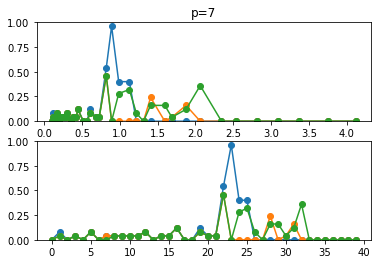

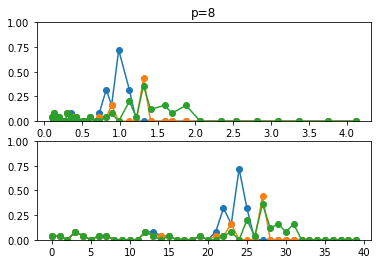

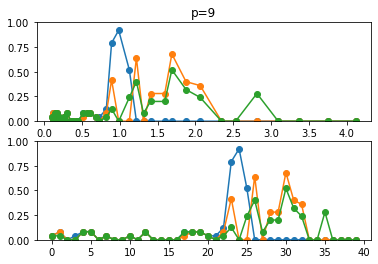

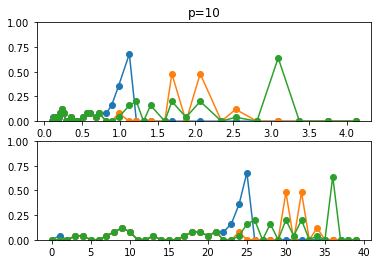

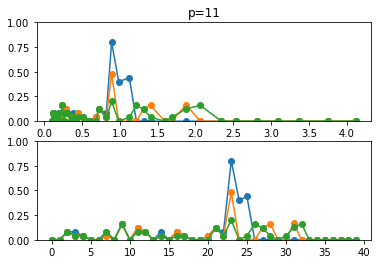

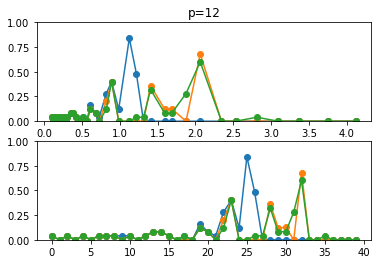

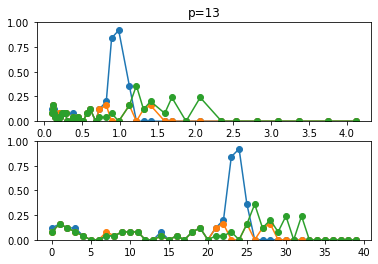

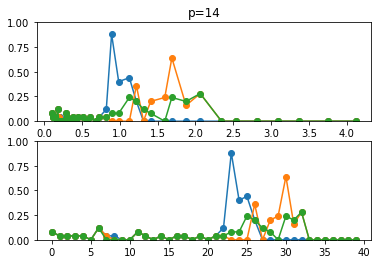

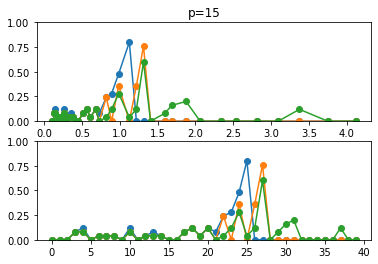

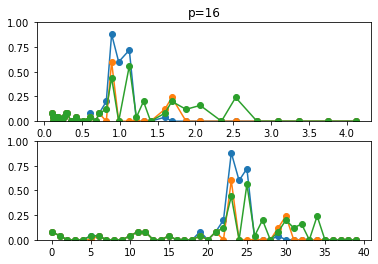

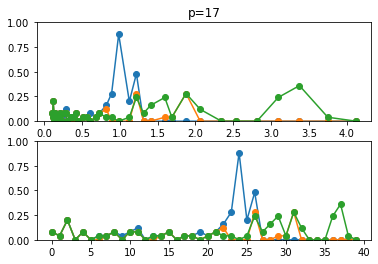

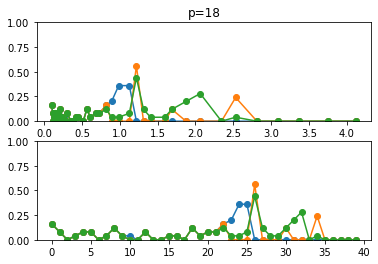

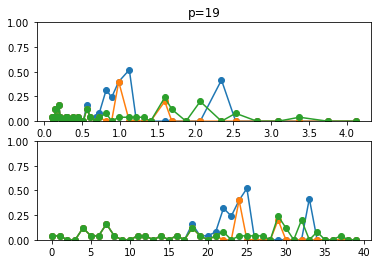

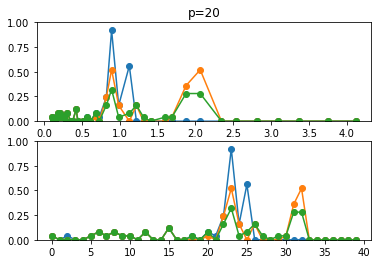

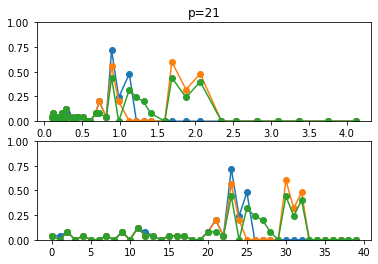

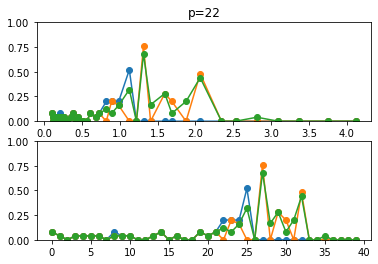

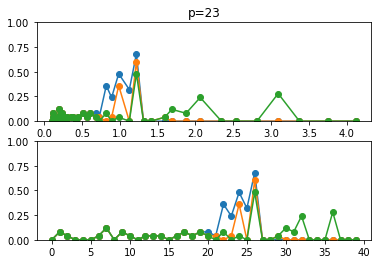

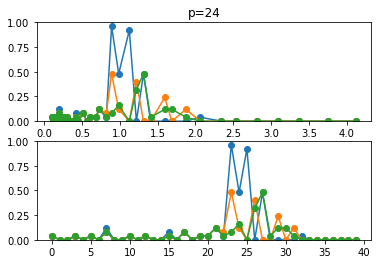

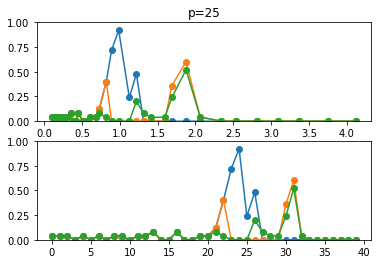

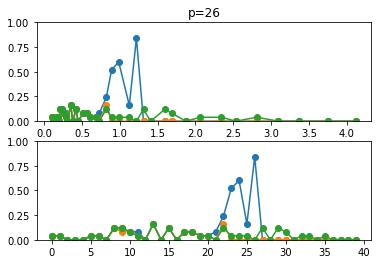

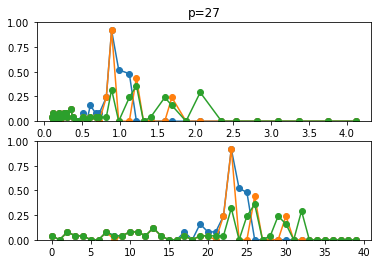

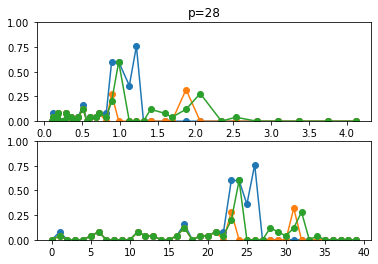

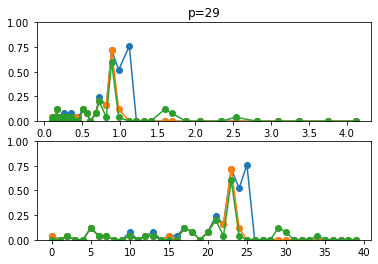

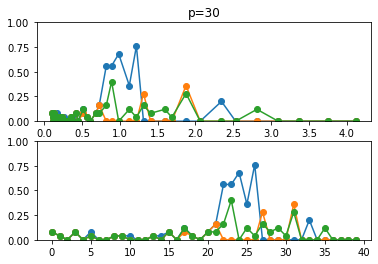

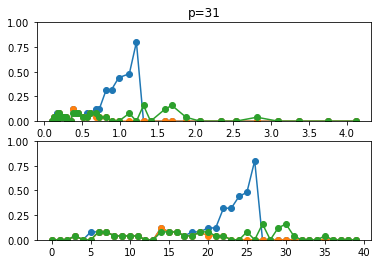

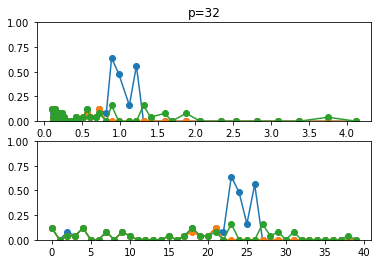

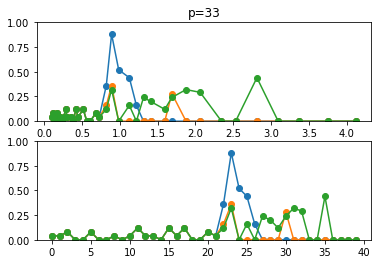

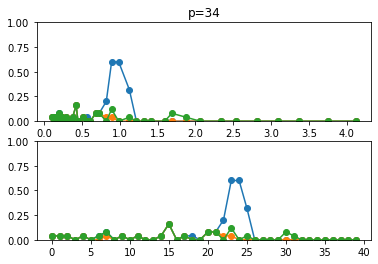

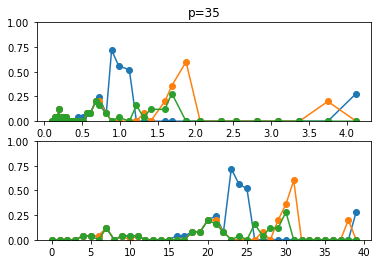

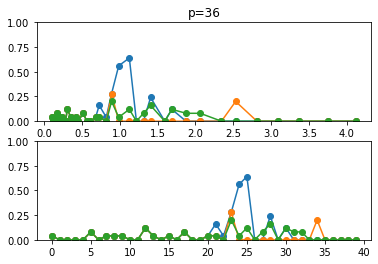

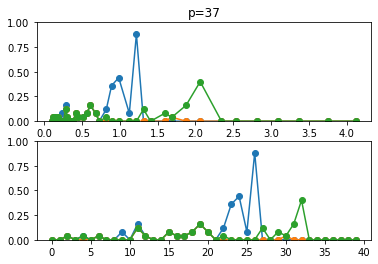

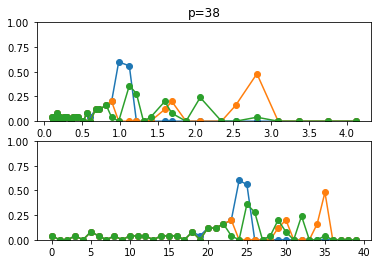

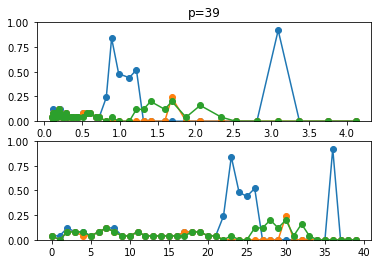

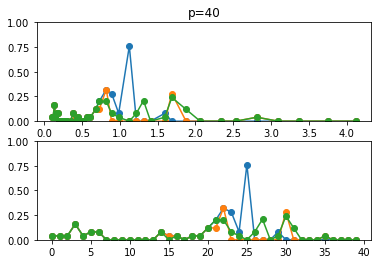

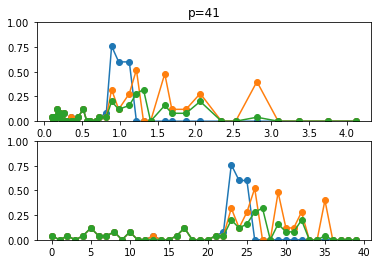

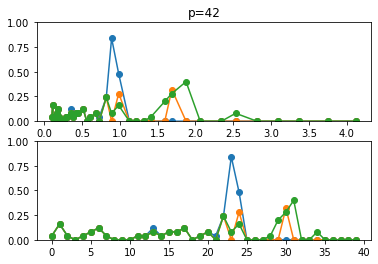

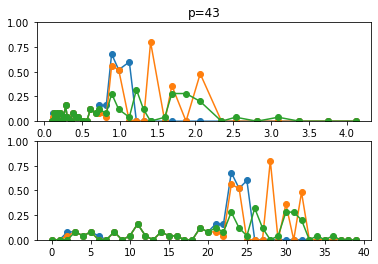

KeyboardInterrupt: 

In [22]:

make_lollipop_comparison_plot(relevant_movies, total_probs, new_total_probs, new_instance_probs, ANALYSIS_BASE,dataset, estim)


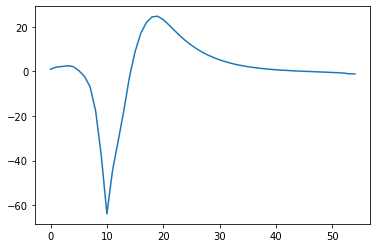

In [16]:
ax = plt.subplot(111)
ax.plot(average_ds[0])

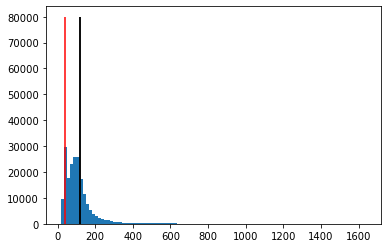

In [56]:
plt.hist(error_stack[:,0], bins = 100);

plt.vlines(average_error[0], 0, 80000, color = "black")

plt.vlines(average_error[0], 0, 80000, color = "black")
exp_error = [np.sqrt(num_samples*2*noise[e]**2) for e in electrodes][0]

plt.vlines(exp_error, 0, 80000, color = "red")

In [51]:
num_samples


55

/Volumes/Lab/Users/jeffbrown/g-sort/src/bootstrap_error_analysis.py:368: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


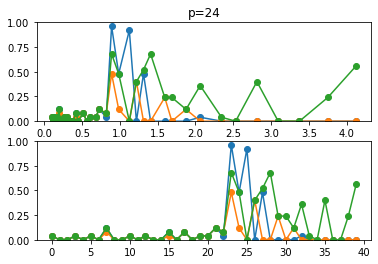

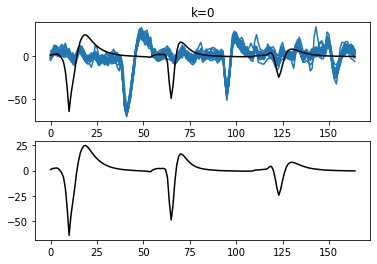

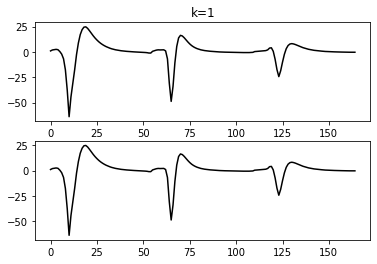

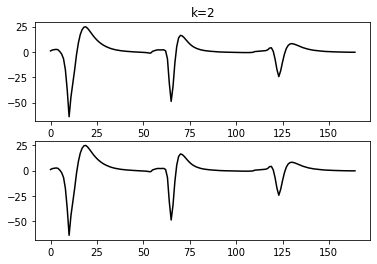

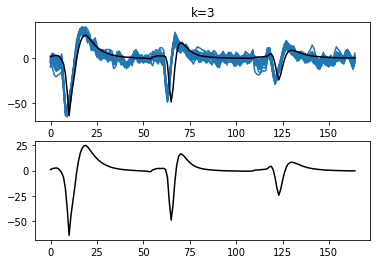

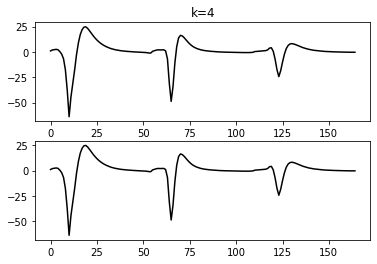

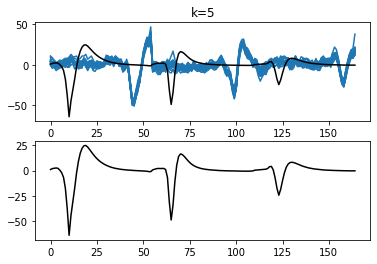

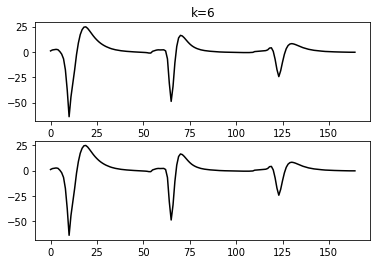

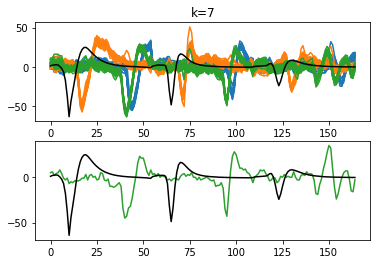

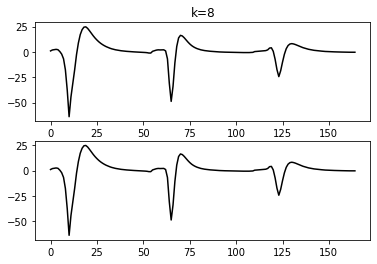

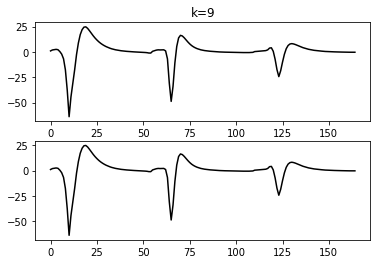

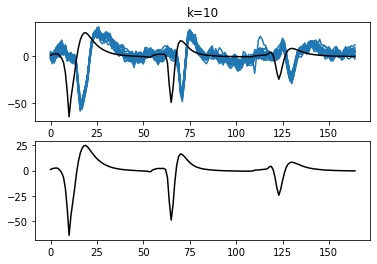

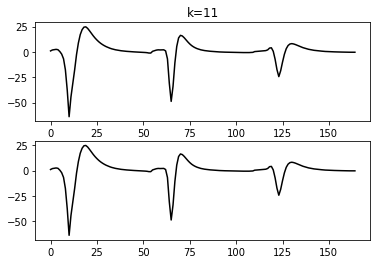

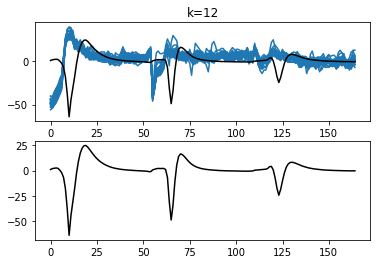

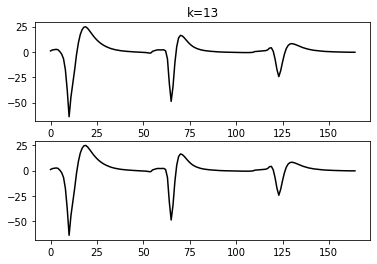

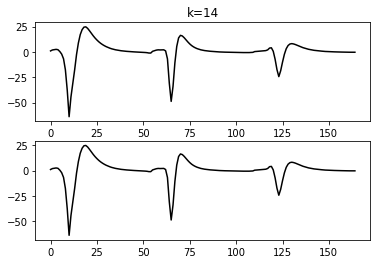

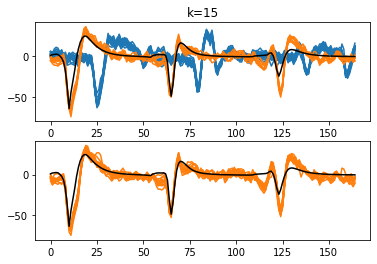

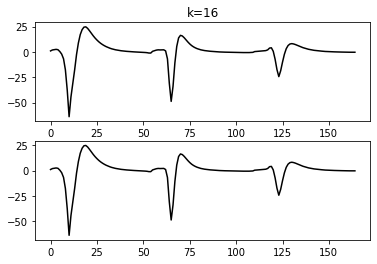

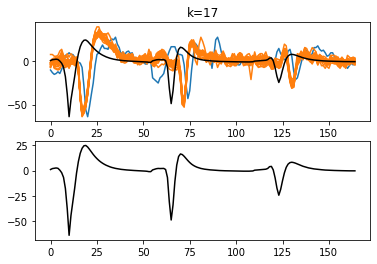

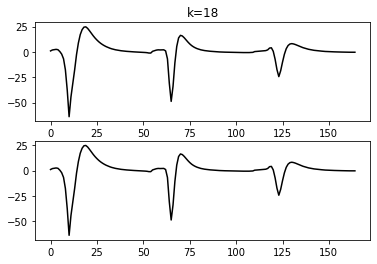

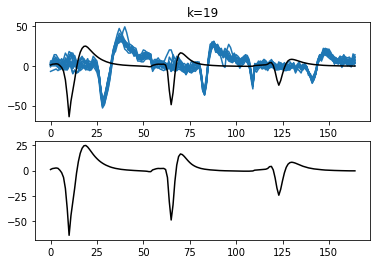

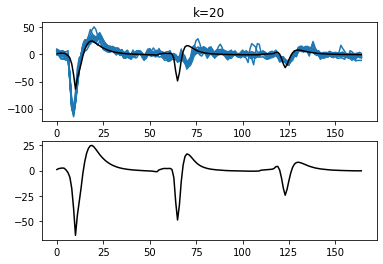

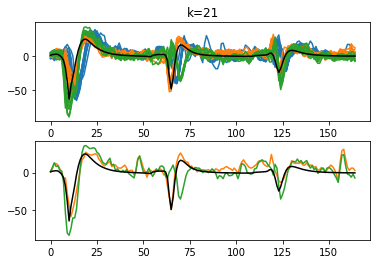

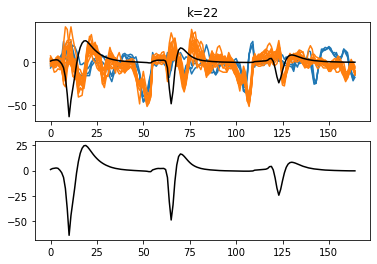

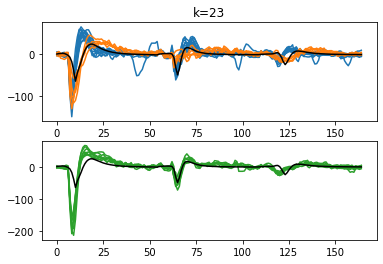

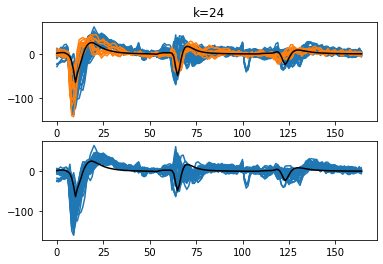

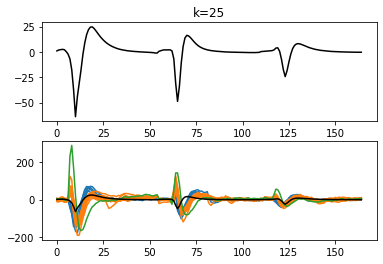

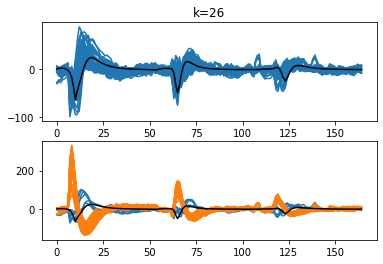

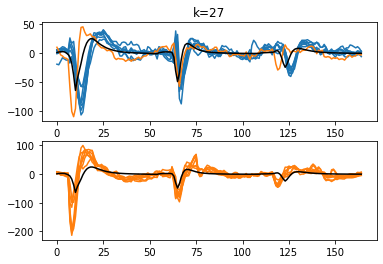

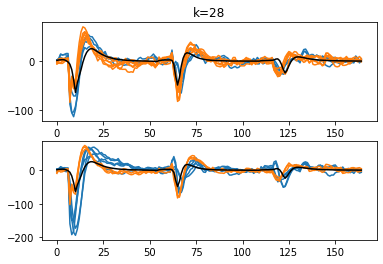

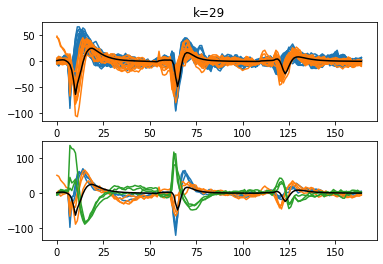

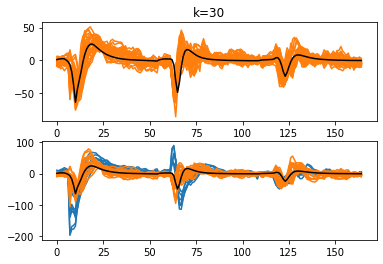

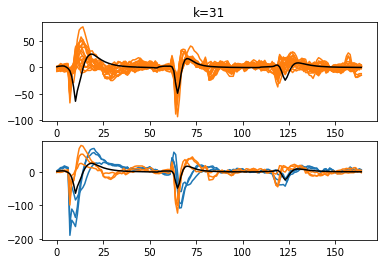

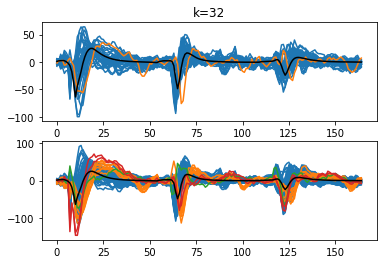

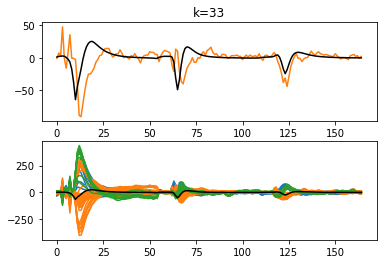

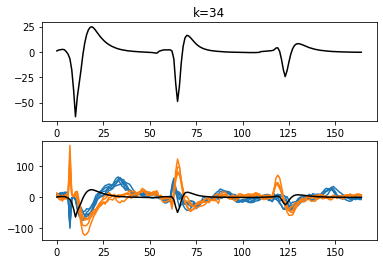

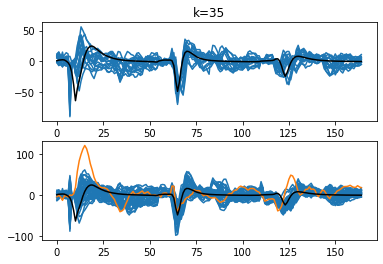

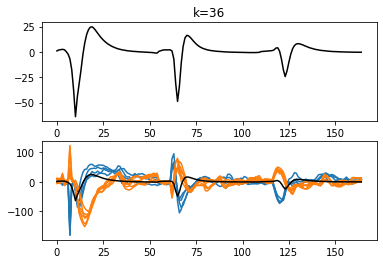

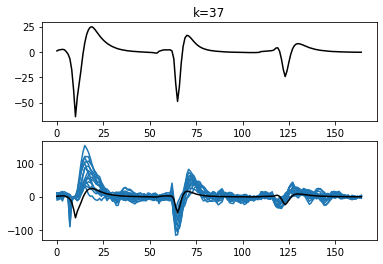

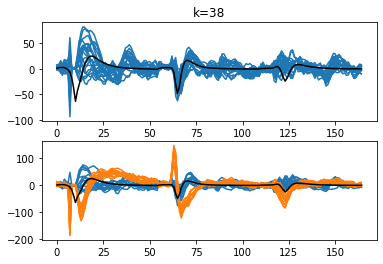

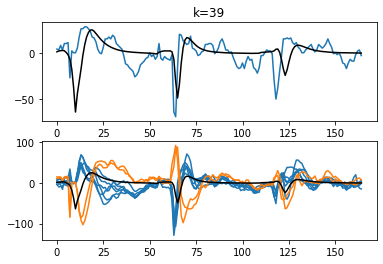

In [42]:
test_set = [0, 1, 2]
electrode = 0
factor = 0.5
new_edge_probs = get_modified_edge_probs(mean_edge_error, edge_probs,average_error,std_error, factor, test_set)
new_instance_probs = get_instance_modified_edge_probs(edge_probs, error, dss_inds, average_error, std_error, factor, test_set,num_trials)
make_dss_comparison(24,average_ds, dss, relevant_movies, total_probs, new_total_probs, new_instance_probs, ANALYSIS_BASE,dataset, estim,error, average_error, std_error, factor, test_set)


In [31]:
np.argwhere(np.all(get_pattern_movies_indices(relevant_movies)==np.array([[3,26]]), axis = 1))

array([[5030]])

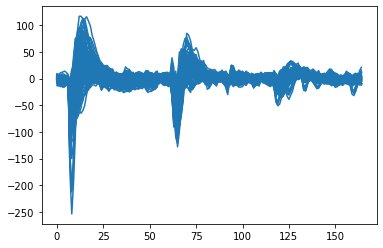

In [34]:
ax = plt.subplot(111)
for ds in dss[5030]:
    ax.plot(ds.reshape(ds.shape[0],-1).T, color = "C0")

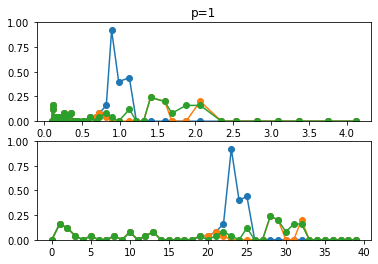

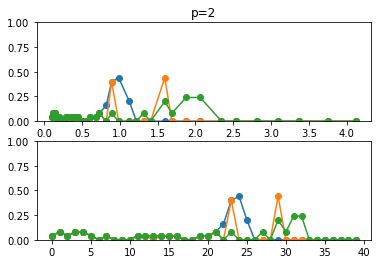

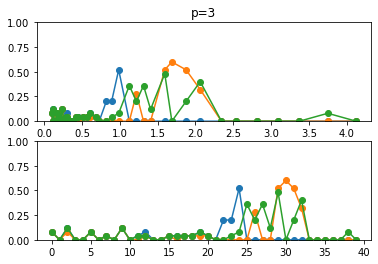

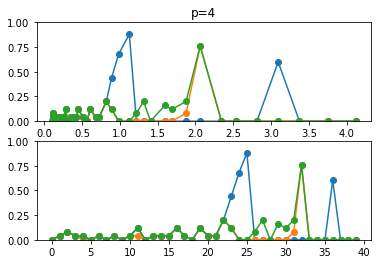

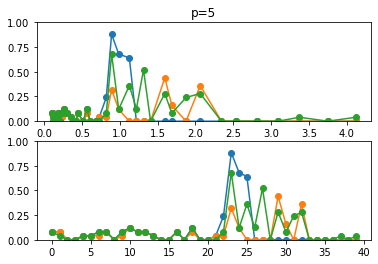

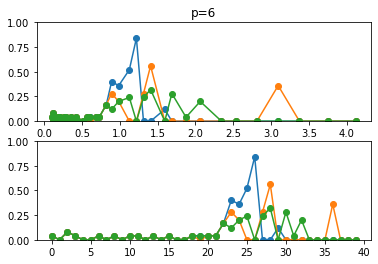

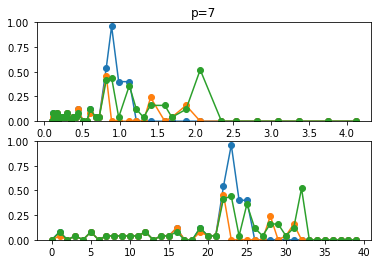

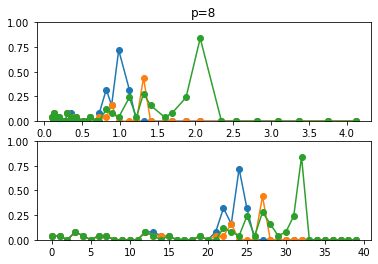

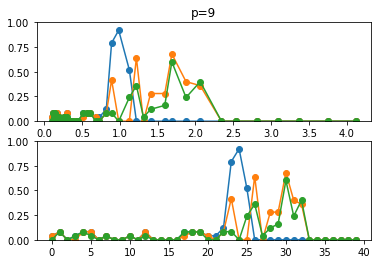

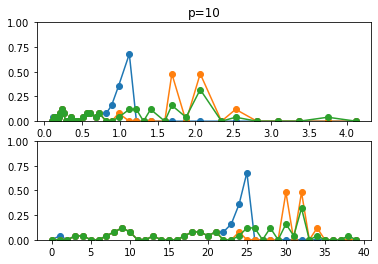

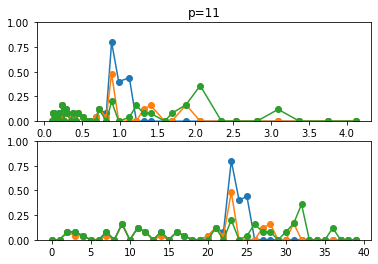

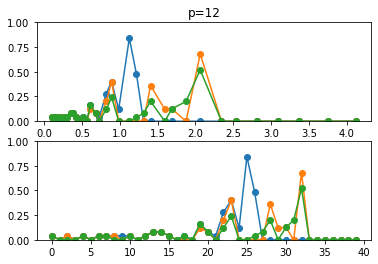

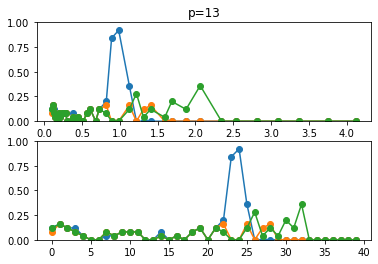

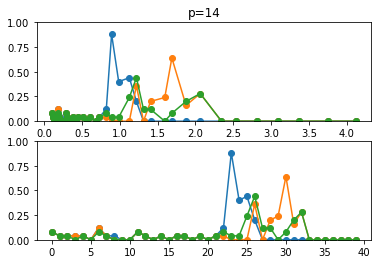

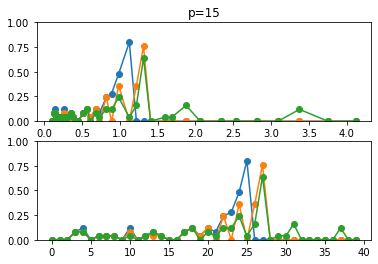

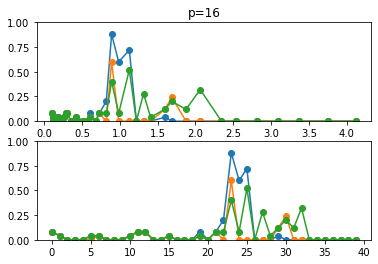

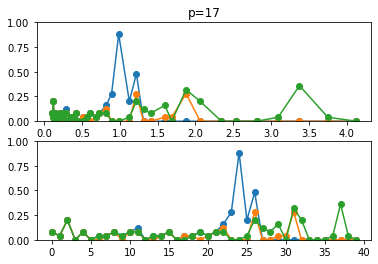

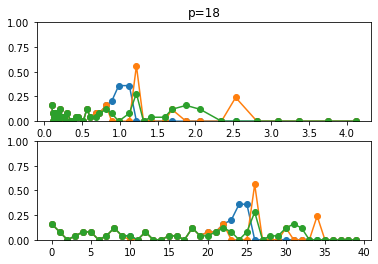

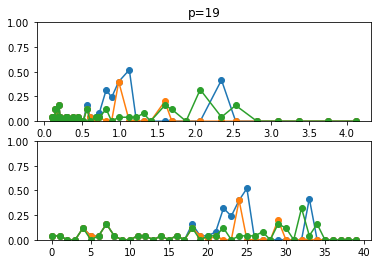

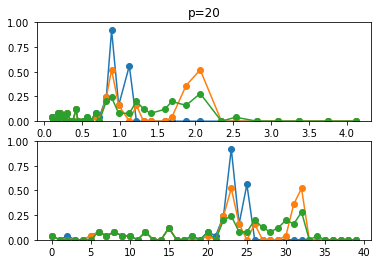

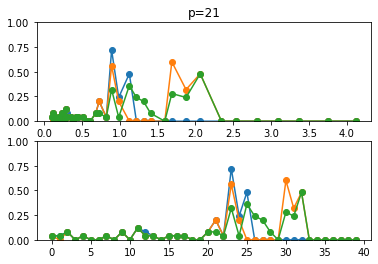

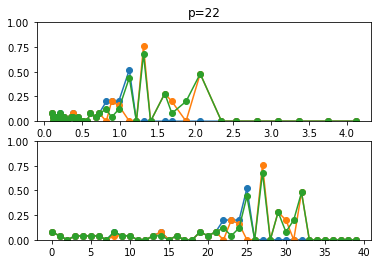

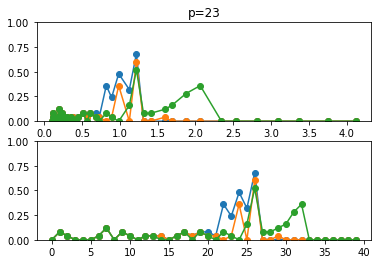

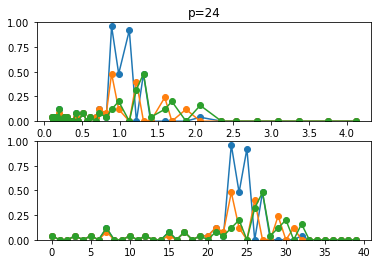

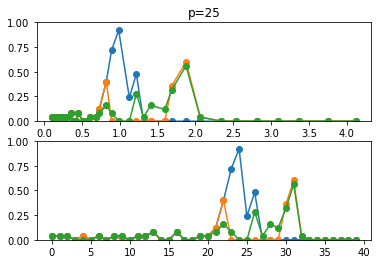

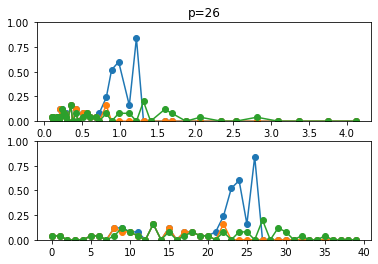

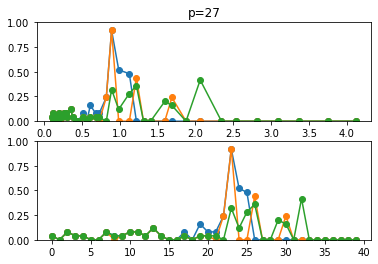

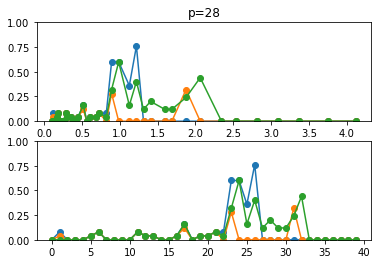

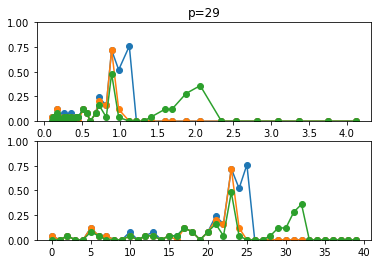

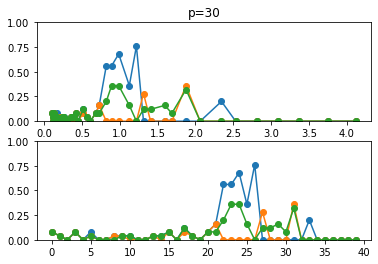

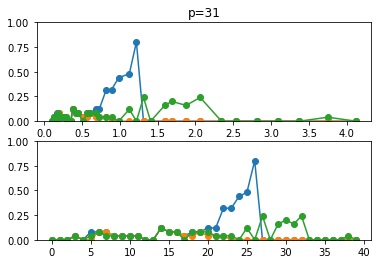

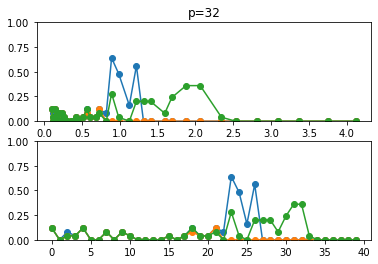

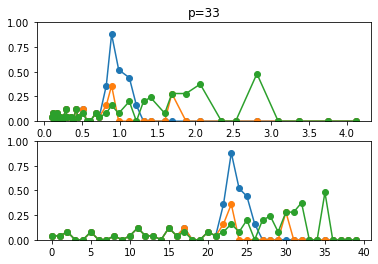

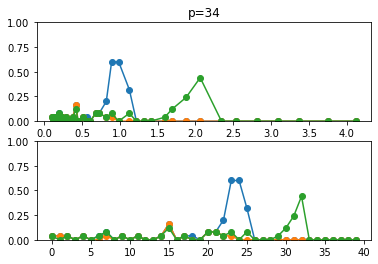

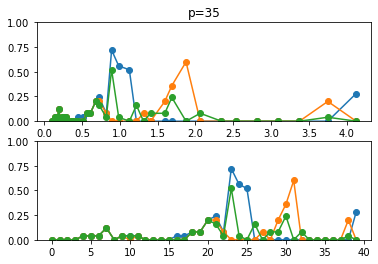

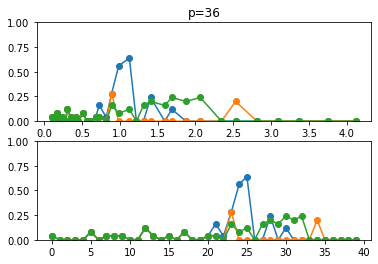

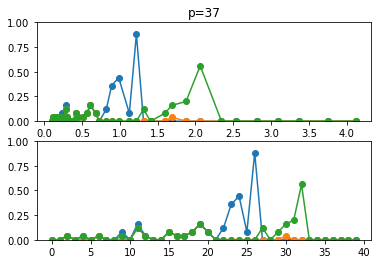

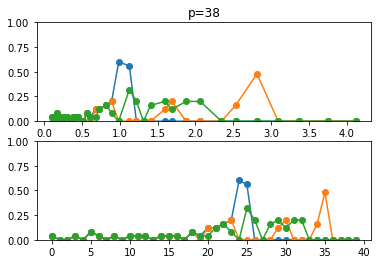

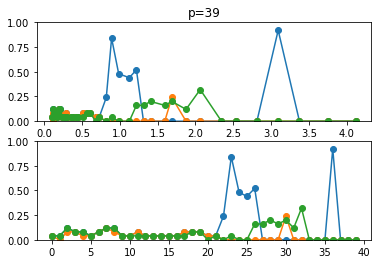

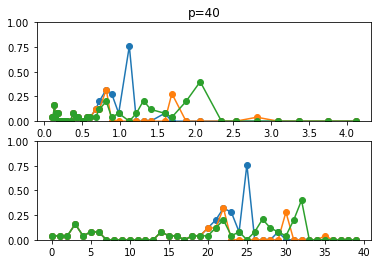

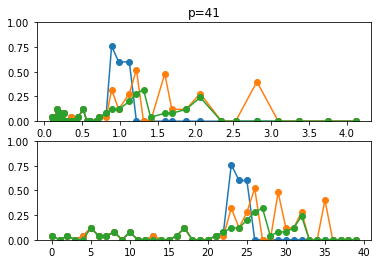

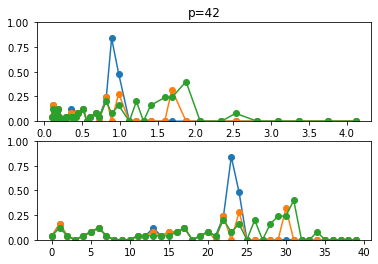

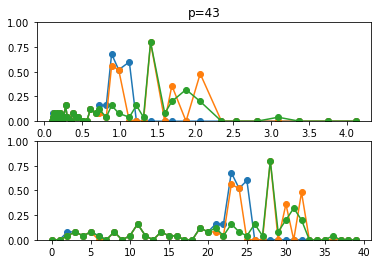

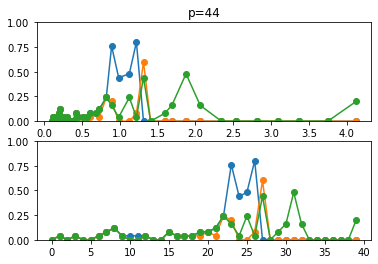

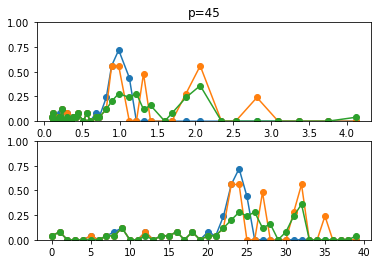

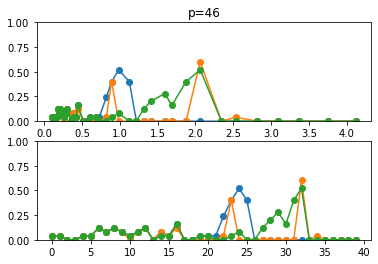

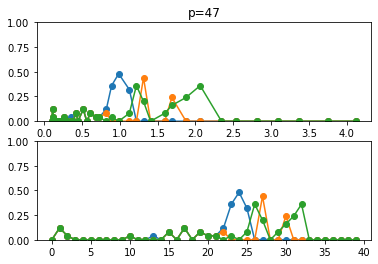

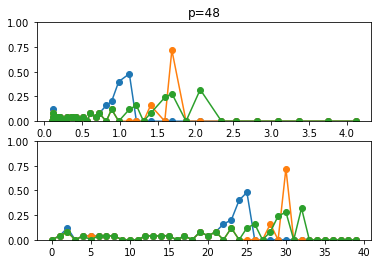

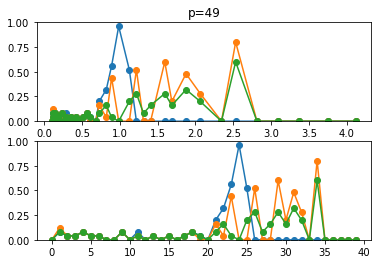

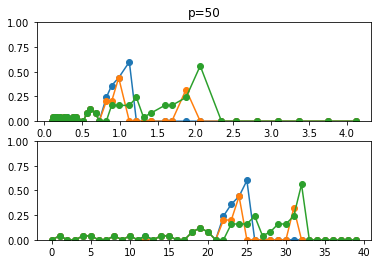

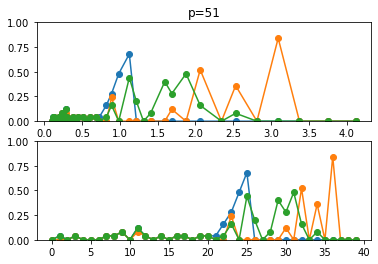

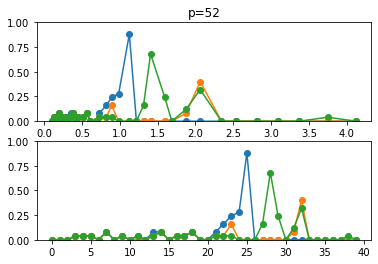

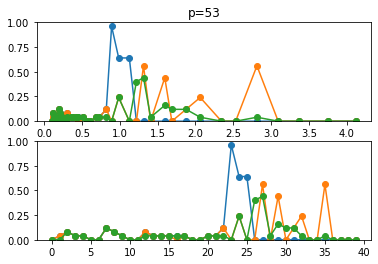

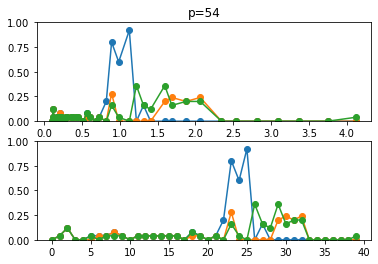

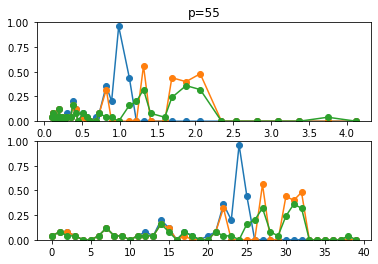

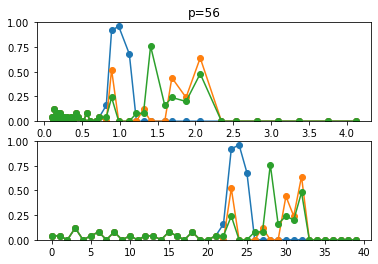

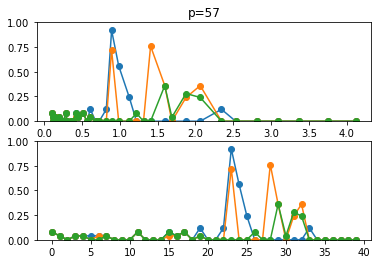

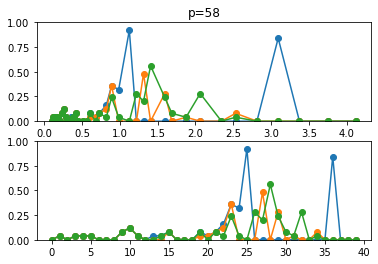

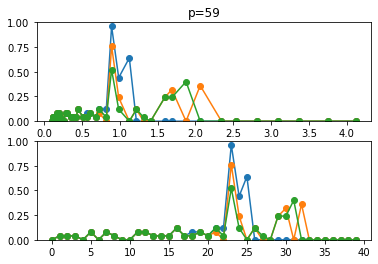

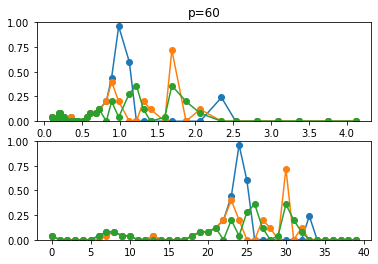

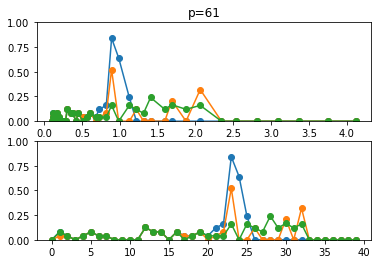

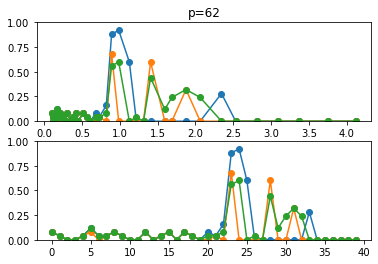

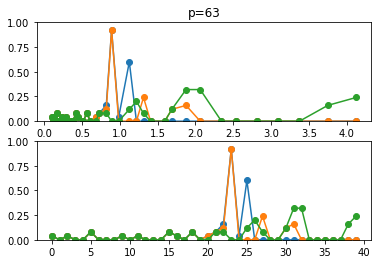

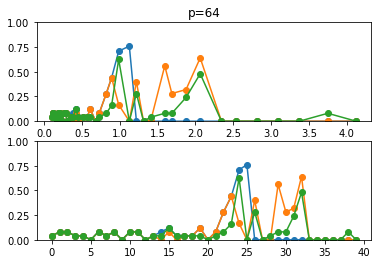

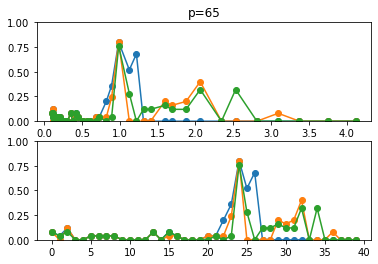

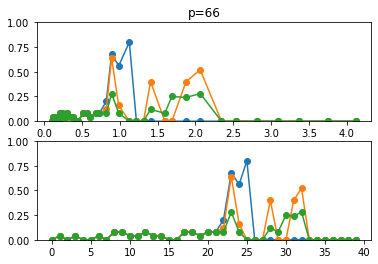

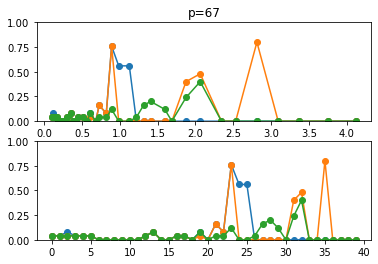

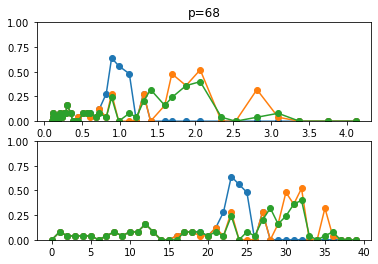

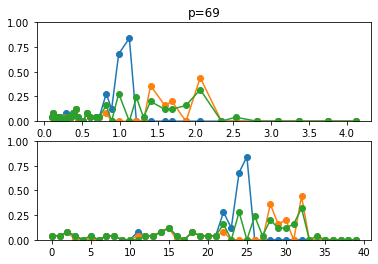

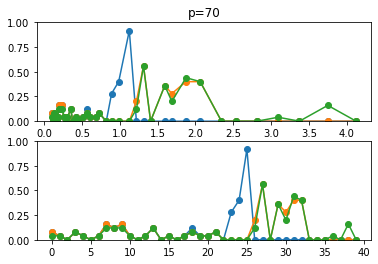

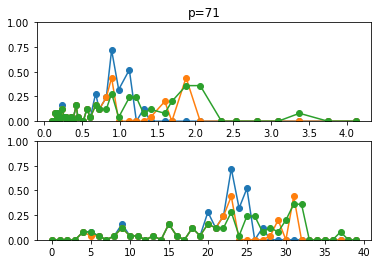

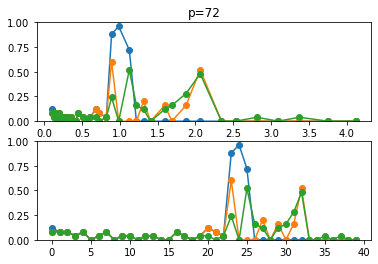

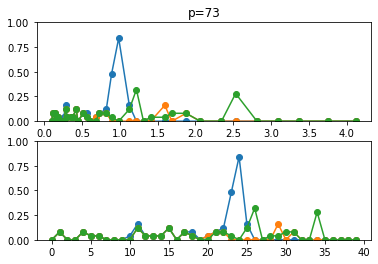

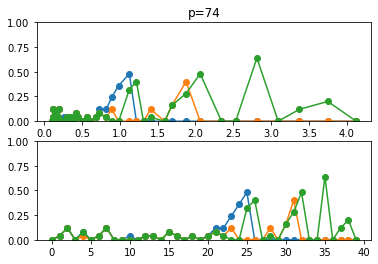

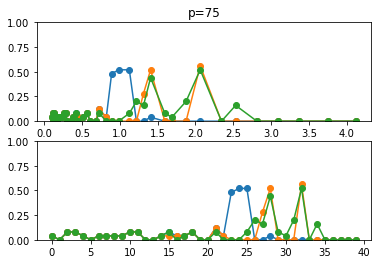

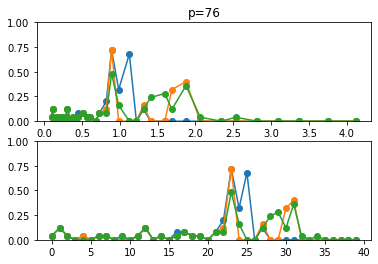

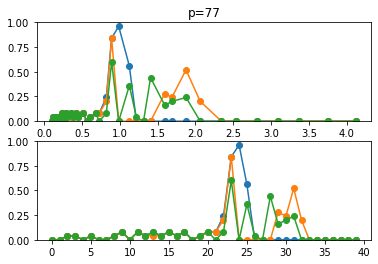

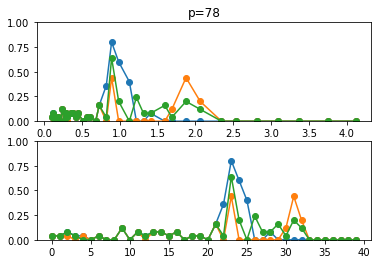

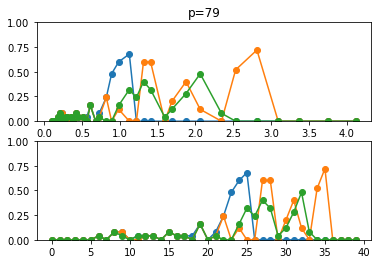

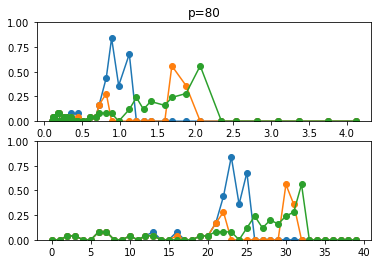

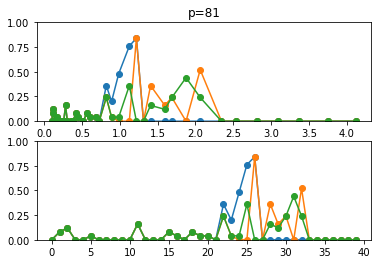

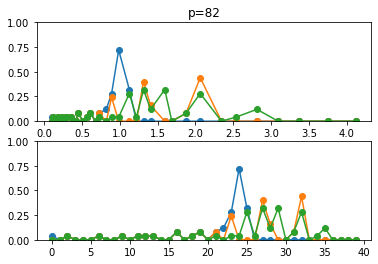

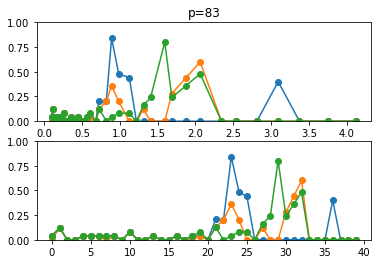

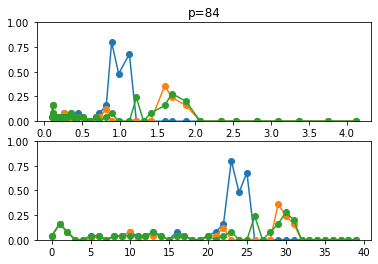

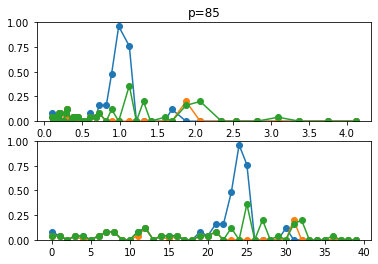

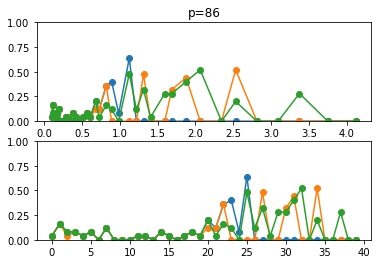

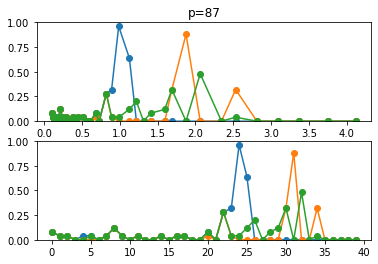

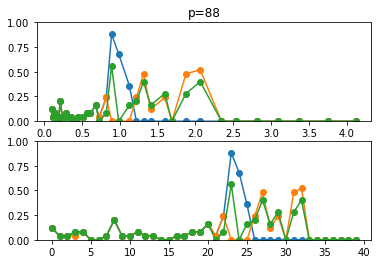

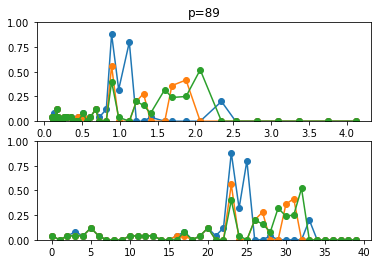

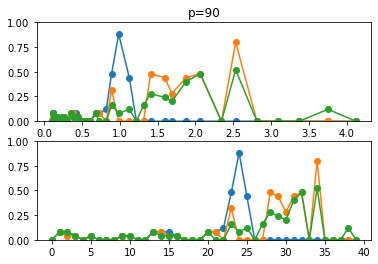

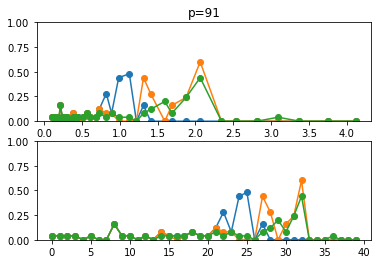

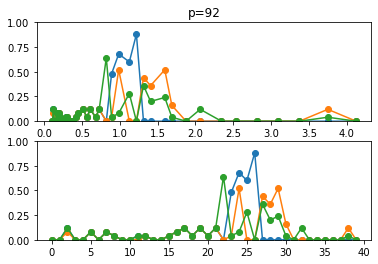

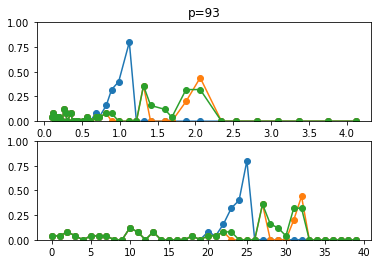

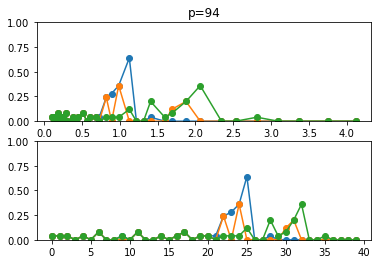

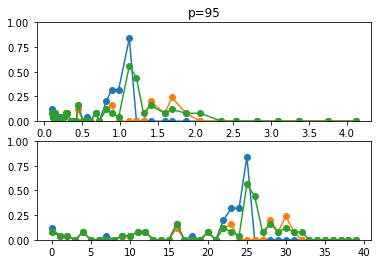

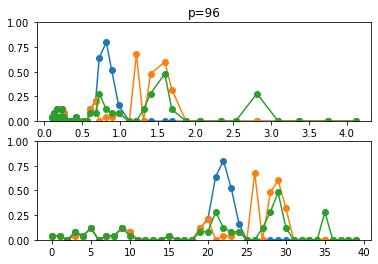

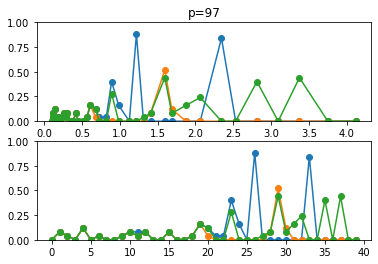

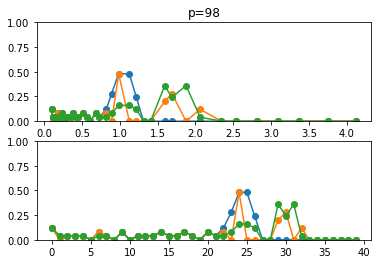

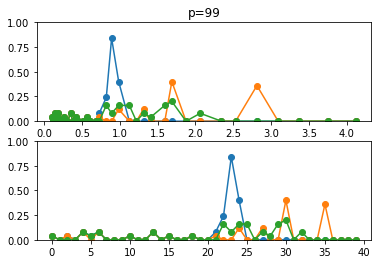

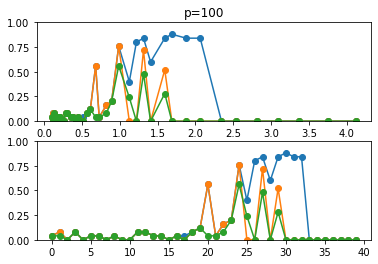

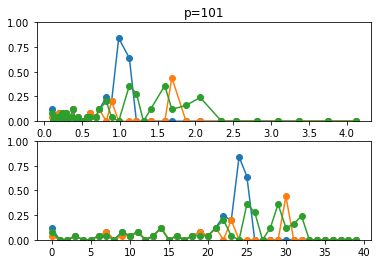

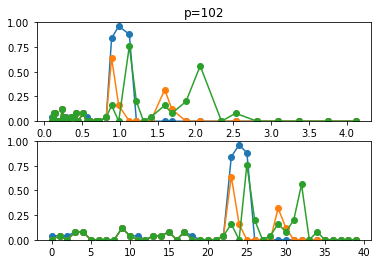

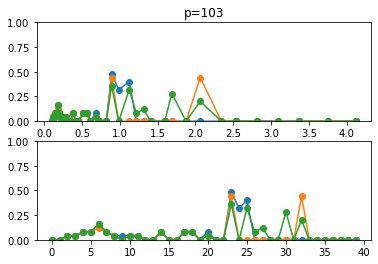

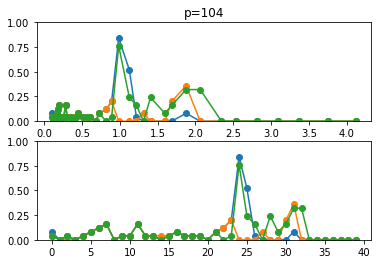

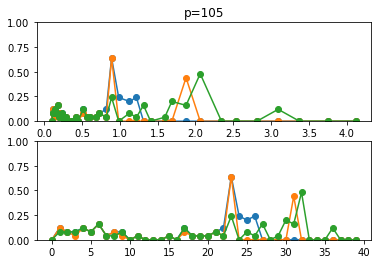

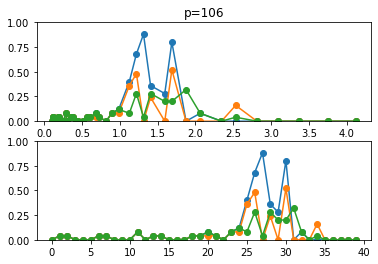

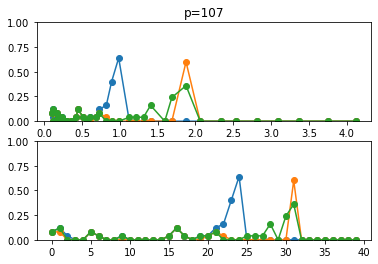

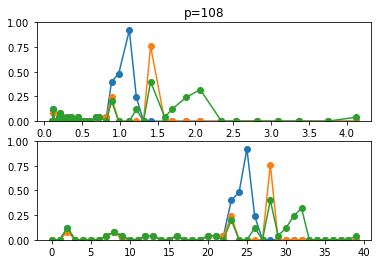

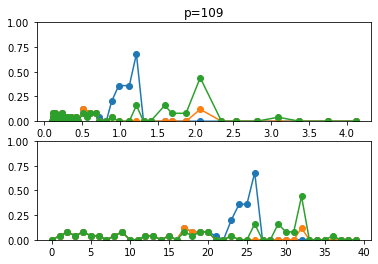

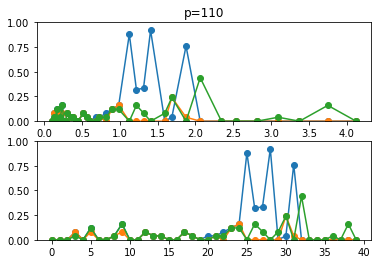

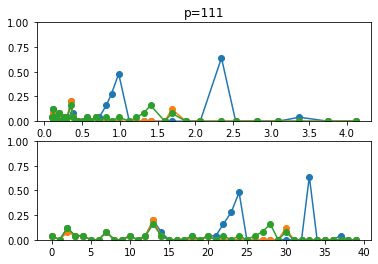

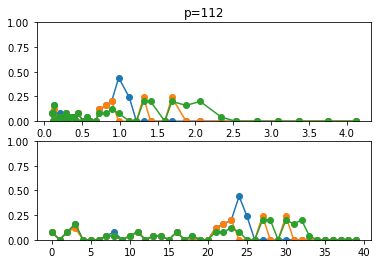

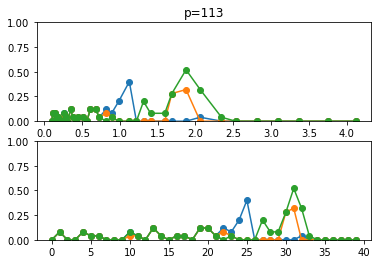

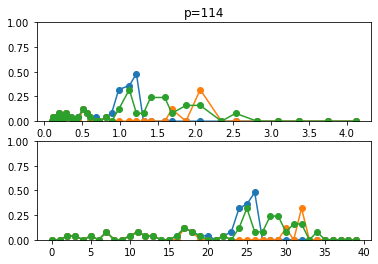

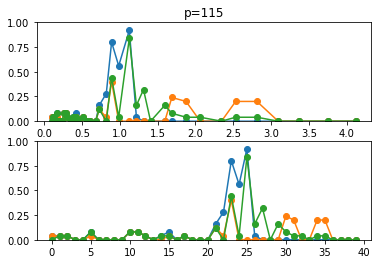

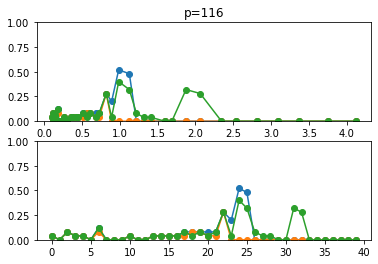

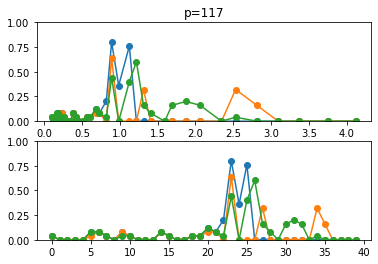

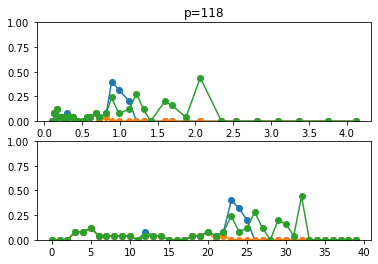

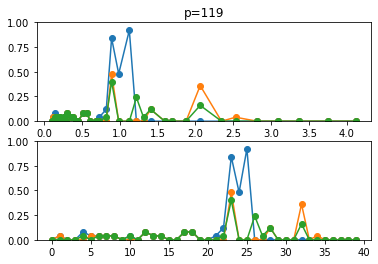

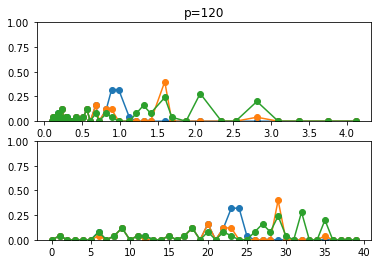

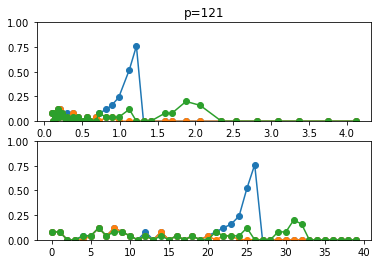

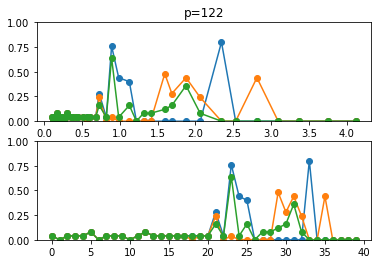

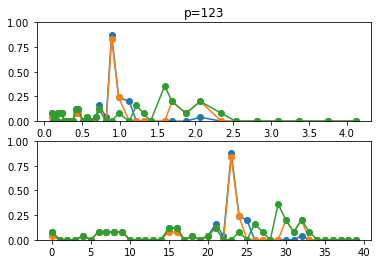

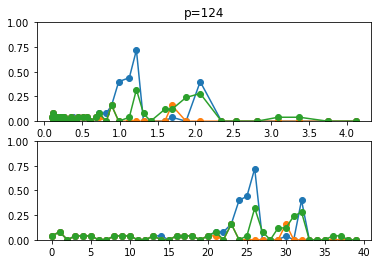

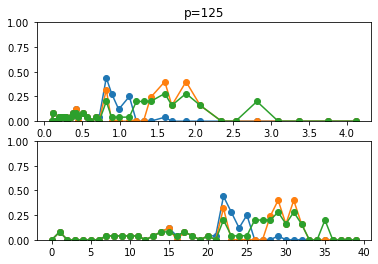

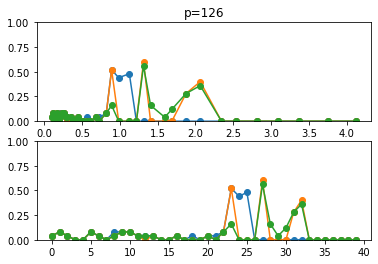

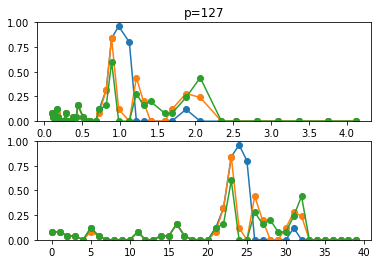

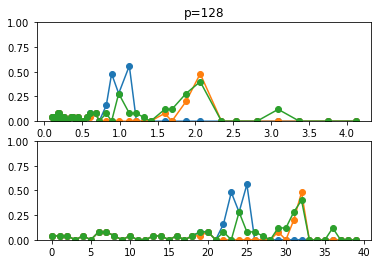

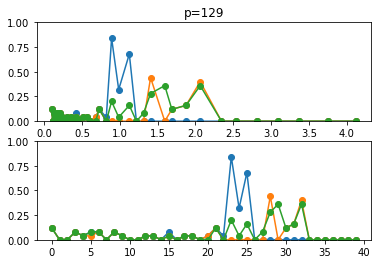

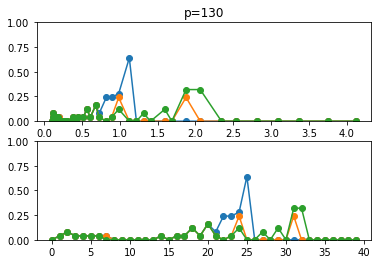

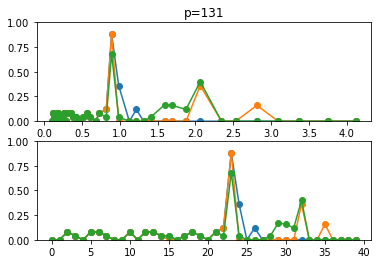

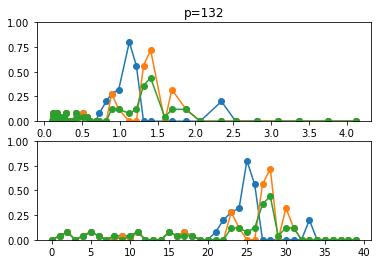

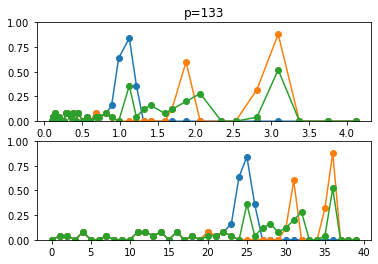

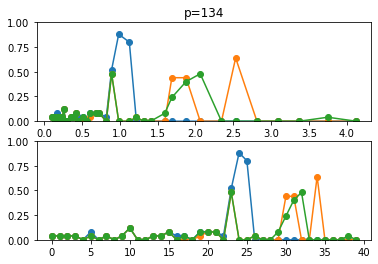

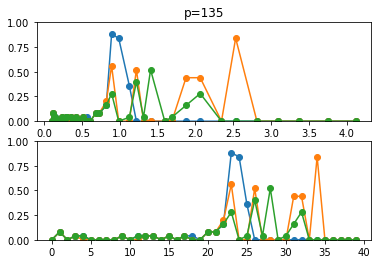

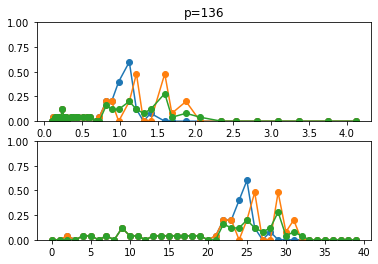

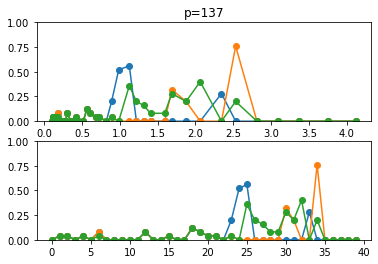

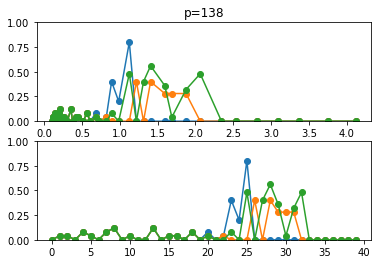

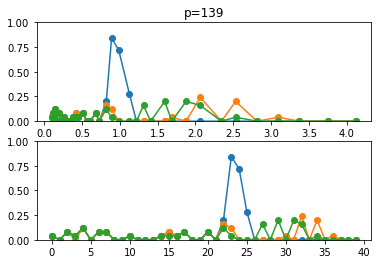

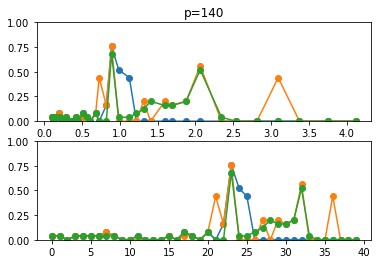

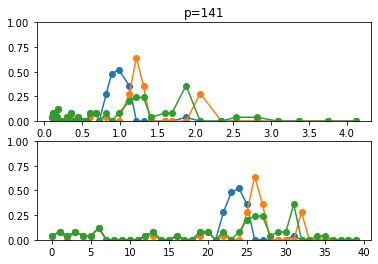

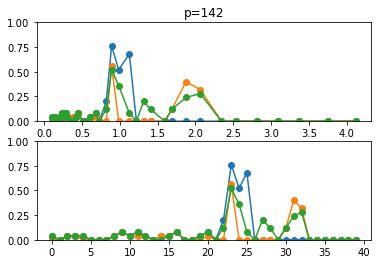

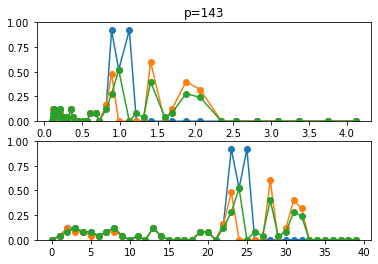

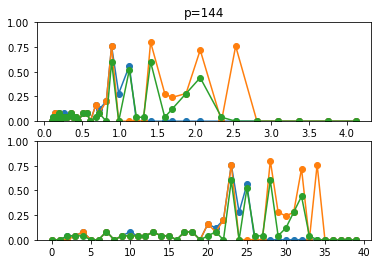

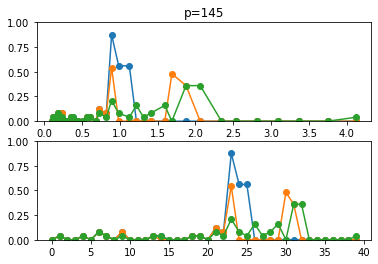

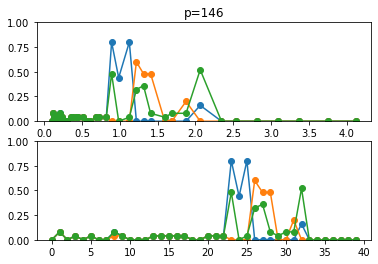

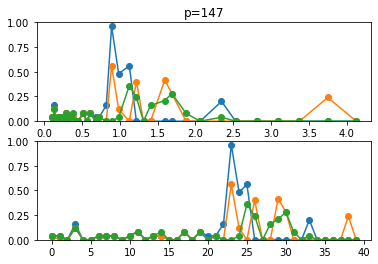

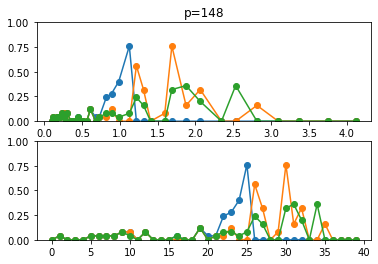

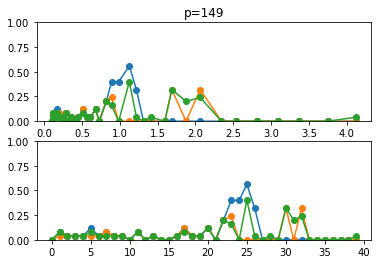

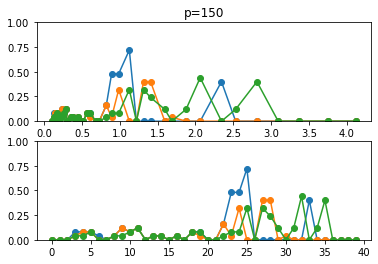

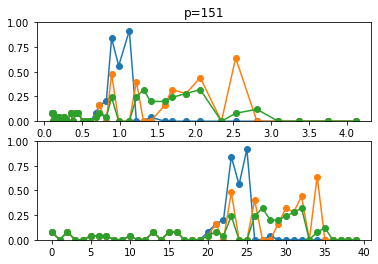

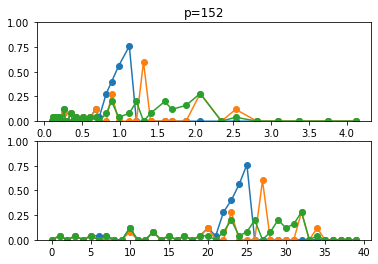

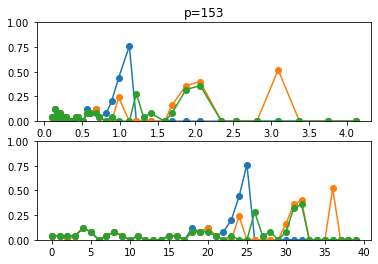

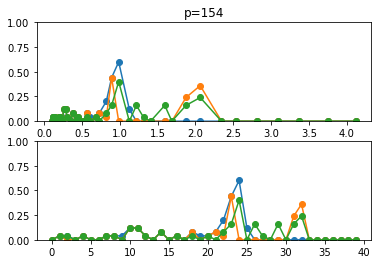

In [66]:
test_set = [0, 1, 2]
electrode = 0
factor = 0
exp_error = np.array([np.sqrt(num_samples*2*(2*noise[e])**2) for e in electrodes])

new_edge_probs = get_modified_edge_probs(mean_edge_error, edge_probs,exp_error,std_error, factor, test_set)
new_instance_probs = get_instance_modified_edge_probs(edge_probs, error, dss_inds, exp_error, std_error, factor, test_set,num_trials)

make_lollipop_comparison_plot(relevant_movies, total_probs, new_total_probs, new_instance_probs, ANALYSIS_BASE,dataset, estim)


In [69]:
new_instance_probs

array([0.  , 0.  , 0.04, ..., 0.04, 0.  , 0.  ])

/Volumes/Lab/Users/jeffbrown/g-sort/src/bootstrap_error_analysis.py:369: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


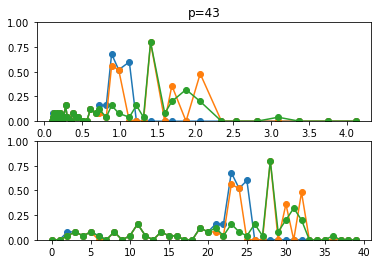

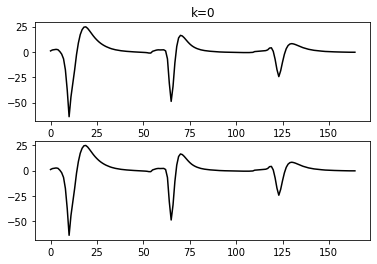

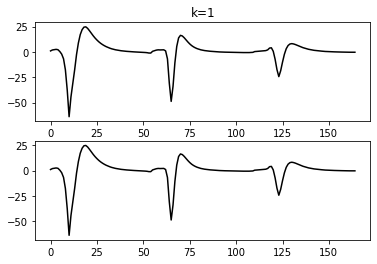

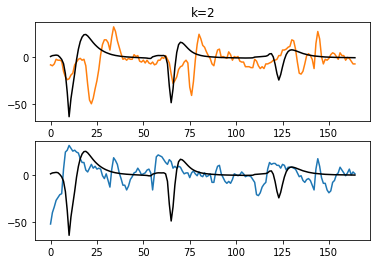

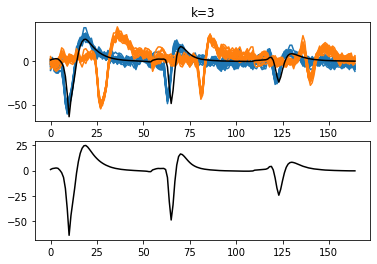

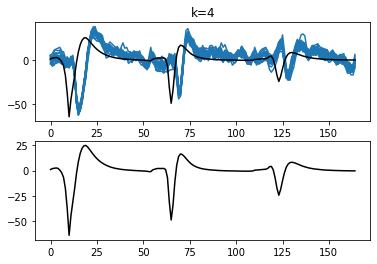

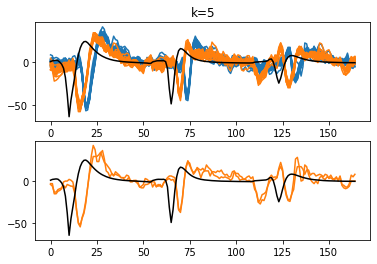

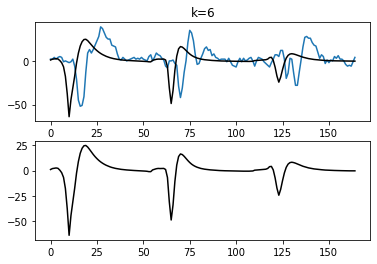

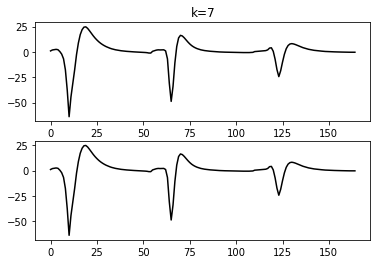

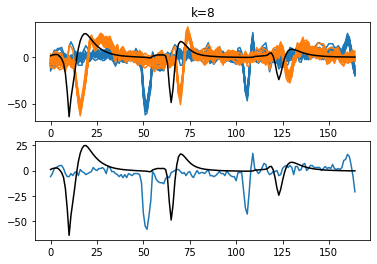

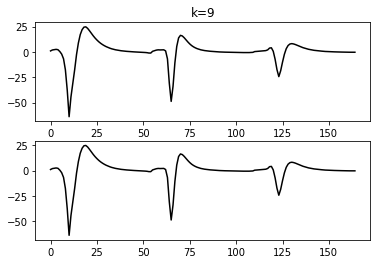

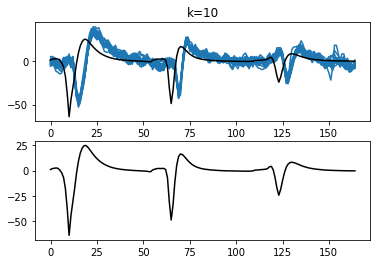

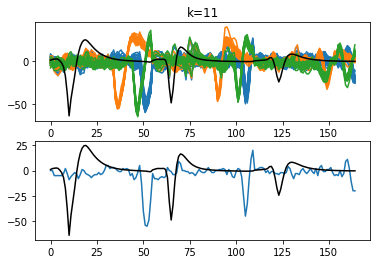

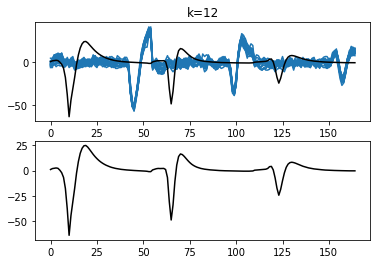

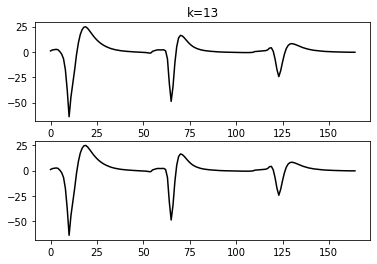

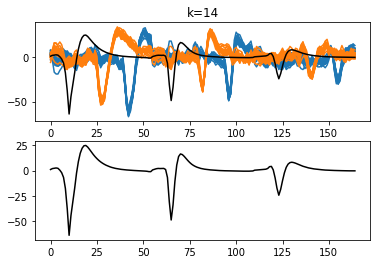

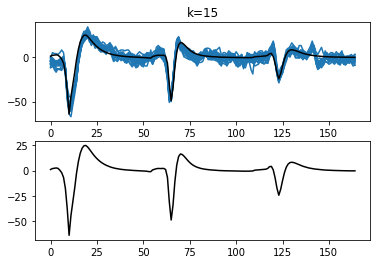

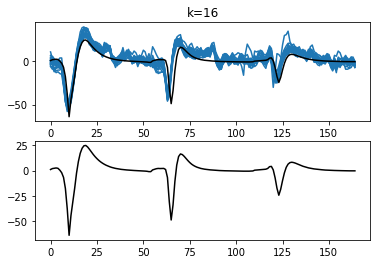

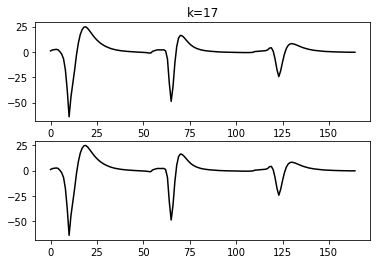

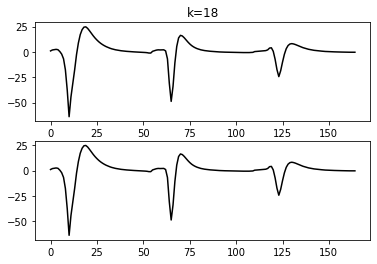

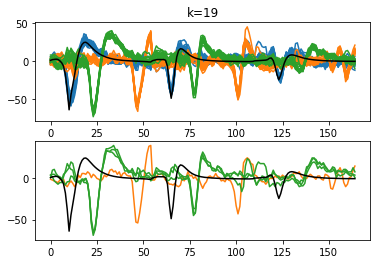

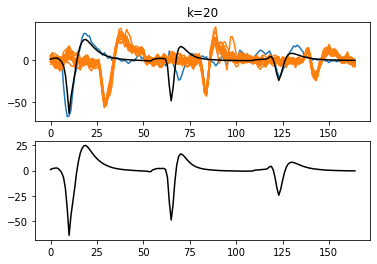

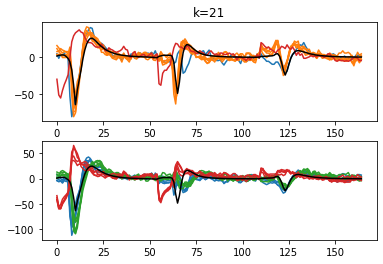

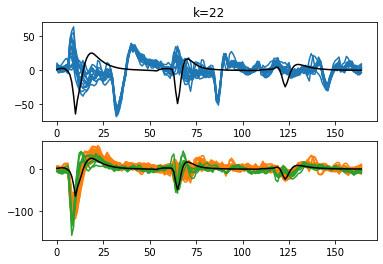

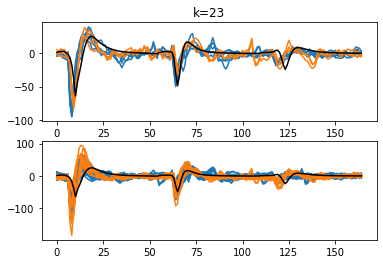

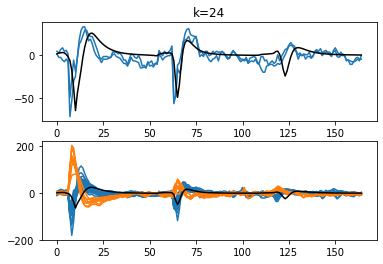

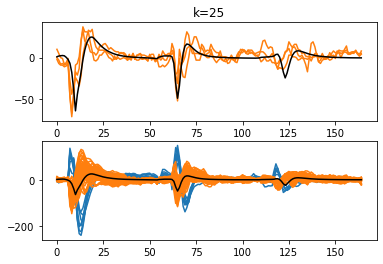

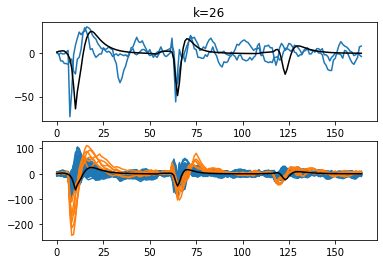

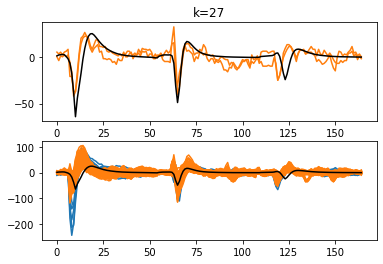

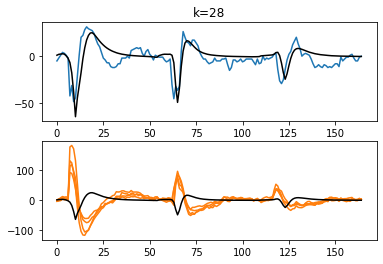

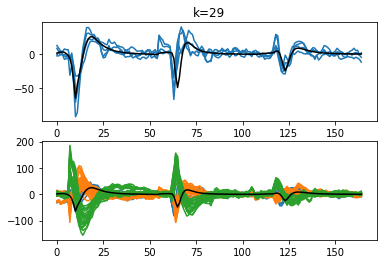

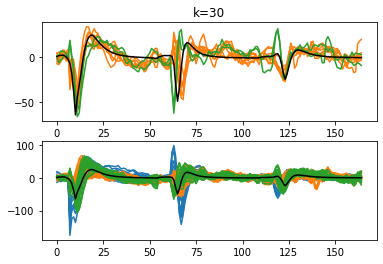

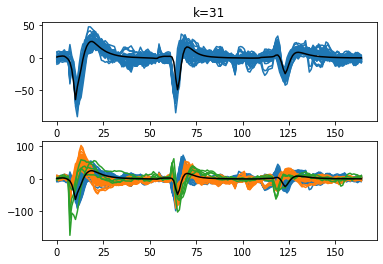

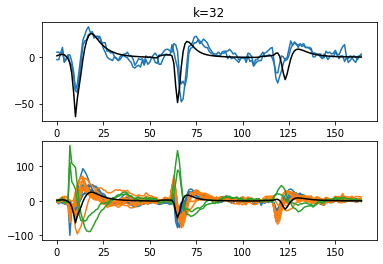

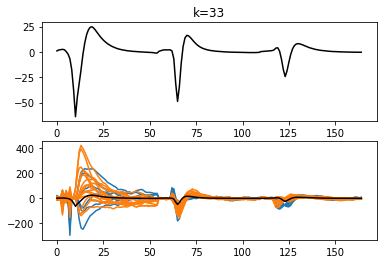

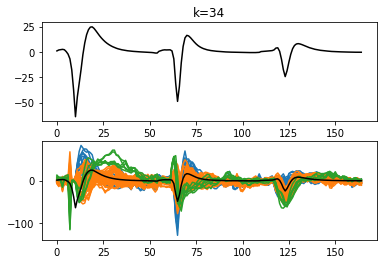

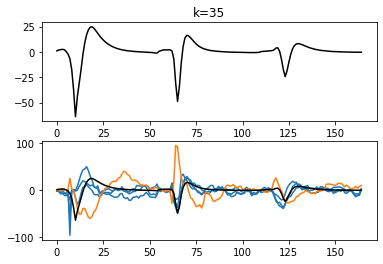

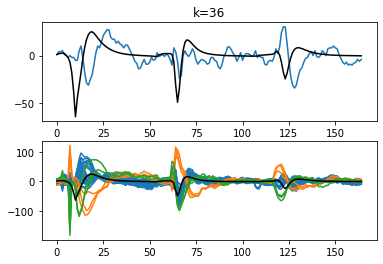

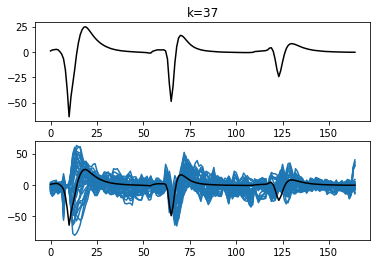

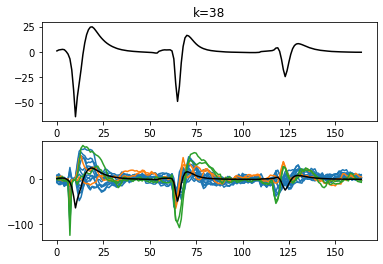

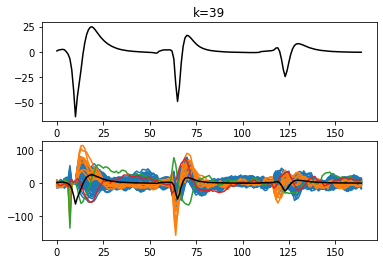

In [70]:
test_set = [0, 1, 2]
electrode = 0
factor = 0
exp_error = np.array([np.sqrt(num_samples*2*(2*noise[e])**2) for e in electrodes])


new_edge_probs = get_modified_edge_probs(mean_edge_error, edge_probs,exp_error,std_error, factor, test_set)
new_instance_probs = get_instance_modified_edge_probs(edge_probs, error, dss_inds, exp_error, std_error, factor, test_set,num_trials)
make_dss_comparison(43,average_ds, dss, relevant_movies, total_probs, new_total_probs, new_instance_probs, ANALYSIS_BASE,dataset, estim,error, exp_error, std_error, factor, test_set)
